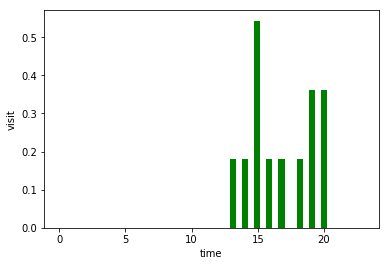

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab

data = pd.read_csv("/Users/Xinyi/DataSet/yelp_dataset/checkin_las_vegas.csv")
#business_id = raw_input ('business_id')
business_id = "wplh4-t6GucDbeM5lKzDTw"

business_data = data.loc[data['business_id'] == business_id]

#print(business_data)
times = (business_data.loc[2,'time'])[1:-1].split(', ')

temp = []

for i in times:
    a = i.split(': ')
    a[0] = int(a[0][6:-1])
    a[1] = int(a[1])
    #temp.append(a)
    temp = temp + [a[0]] * a[1]
(mu, sigma) = norm.fit(temp)

n, bins, patches = plt.hist(temp,50, range=[0, 23], normed=1, facecolor='green', alpha=1)

#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=2)

_ = plt.xlabel('time')
_ = plt.ylabel('visit')

plt.show()

In [ ]:
# this notebook is going to show how to predict GoodForMeal attribute using checkin data
# technologies: PCA, OneVsRestClassifier using Linear SVC

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
neighbor = "The_Strip"
mealtype = pd.read_csv(neighbor+"_mealtype.csv")

In [3]:
mealtype.set_index('business_id')

,breakfast,lunch,dinner,mealtype_label
business_id,,,,
glkEaoxbewiSMBiXs945JA,False,True,True,11
juuv0QPE_MfnVjevQTpCDg,False,False,False,0
Kx0MUrNQ737s-VVElk6Vig,True,True,False,110
dn_ipqbm7_jUz5X3rDez_A,False,True,True,11
ZosrzTfiiPhbURA04AQTUA,True,True,False,110
LFs5jyYdXlzi0SpAYi1eSA,False,True,True,11
hmgbkFngXKjpWqJItOPYpA,False,False,False,0
3mpBYH3k_lfzycajGtkggQ,False,True,False,10
g7fXSjIsE31hLIW5z60zfg,False,True,False,10


In [4]:
checkin = pd.read_csv('The_Strip_labeled_checkin_Sat.csv')
checkin_unlabeled = pd.read_csv('The_Strip_unlabeled_checkin_Sat.csv')

In [5]:
checkin.set_index('business_id')
checkin_unlabeled.set_index('business_id')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
business_id,,,,,,,,,,,,,,,,,,,,,
5Zc41a446gV3K_o7CDs69Q,33,40,33,32,26,25,19,42,24,15,...,13,17,22,32,30,23,33,37,25,37
rOdbLPm_u_7jWM_GDxquEg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_7EsArRtaywrPasvA8ryfg,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
El4FC8jcawUVgw_0EIcbaQ,293,353,405,360,418,349,354,330,206,155,...,99,180,224,234,309,391,391,358,406,393
ry-FLqYclt7okJbdYcmOhw,1,7,7,4,3,6,6,0,3,1,...,0,2,2,3,2,3,2,7,6,4
ECOkEVUodMLUxvI0PMI4gQ,7,13,14,34,92,240,287,210,177,133,...,4,3,6,10,13,14,13,8,8,12
oJZNHz5UUVUgrZwVBVlpYw,19,11,10,7,11,16,6,7,6,12,...,1,1,36,126,72,35,14,25,21,19
zCaczzZnQUiduNNFvLa0Gg,1,5,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
M--CB6Fhp4XKxsR2PlcP9w,21,22,18,7,13,15,14,5,3,1,...,1,1,2,3,12,25,36,46,48,50


In [6]:
data = pd.merge(checkin, mealtype, how='left');
data.set_index('business_id')

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,breakfast,lunch,dinner,mealtype_label
business_id,,,,,,,,,,,,,,,,,,,,,
SU56w479vUfFHsvmvQIf7A,0,3,8,4,0,2,1,0,0,0,...,1,4,3,6,0,1,False,True,True,11
hRQS8y-uG2kc8miWVYiLuQ,16,24,32,47,30,14,6,3,1,0,...,1,1,1,0,0,2,False,False,True,1
SRUHJIKqhvKu2BFDTSoPww,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,True,False,10
fTtkz2RhWNAp6jKiIzXf_A,14,7,4,3,0,0,0,1,0,0,...,18,25,29,19,11,17,False,True,False,10
WK542yG4t2PUvaBOkjcwNA,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,False,False,False,0
4mYPOzBokDgz307TW2EIKw,1,1,7,1,6,0,0,0,0,1,...,7,5,3,0,2,3,False,False,False,0
ijg7qQCYnhUWBd5JUxbfvA,5,10,9,7,5,8,7,7,8,16,...,13,13,11,13,7,11,False,True,False,10
ai5dbb7P-qwt113PaJJCwg,0,0,1,1,2,2,4,2,0,0,...,10,5,5,1,1,1,True,True,True,111
BG8lvZoPTrPJqcvTh-ytzg,1,1,1,8,4,2,2,0,0,1,...,0,0,1,0,0,0,False,False,True,1


In [7]:
data_to_plot = data.loc[:,['mealtype_label','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]
# data_to_plot.info(verbose=True)

In [8]:
data_to_plot.loc[:,["mealtype_label",'0']].groupby(['mealtype_label']).count()

,0
mealtype_label,
0,188
1,203
10,106
11,199
100,40
110,40
111,33


In [9]:
# Conclusion: resturants that are suitable for breakfast but not for lunch, are not suitable for dinner

In [10]:
data_to_clustering = data.loc[:,['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]
training_data = data_to_clustering.values

In [11]:
#PCA traning data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(training_data)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
#PCA testing data
unlabeled = checkin_unlabeled.loc[:,['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]
testing_data = unlabeled.values
principalComponents_testing = pca.fit_transform(testing_data)
principalDf_testing = pd.DataFrame(data = principalComponents_testing,columns = ['principal component 1', 'principal component 2'])

In [12]:
#plot original data
target_str = 'mealtype_label'
finalDf = pd.concat([principalDf,data[[target_str]]], axis = 1)
targets = [0,1,10,11,110,100,111]
finalDf

,principal component 1,principal component 2,mealtype_label
0,-47.366535,-9.010703,11
1,-21.341674,27.855404,1
2,-56.697346,-10.710570,10
3,-8.332025,-26.808471,10
4,-56.131387,-11.300166,0
5,-45.601786,-12.708797,0
6,-18.602965,-4.693882,10
7,-45.047165,-15.376126,111
8,-52.427107,-6.119152,1
9,-55.183210,-10.359407,100


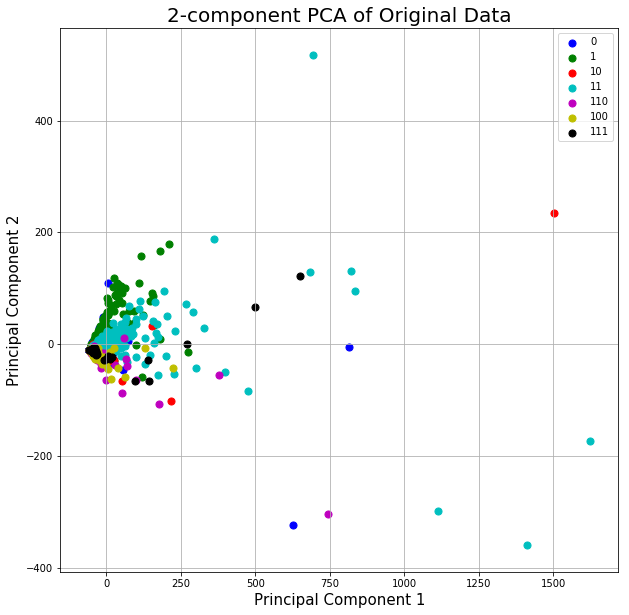

In [16]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-component PCA of Original Data', fontsize = 20)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[target_str] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [17]:
X = principalComponents
ydf = data[['mealtype_label']]
from sklearn.multiclass import OneVsRestClassifier
y = ydf.values

In [18]:
# different classification algorithm

In [19]:
from sklearn import linear_model

In [20]:
y_predicted = OneVsRestClassifier(linear_model.Lasso(alpha=0.1)).fit(X, y).predict(X) 

In [21]:
y_predicted = OneVsRestClassifier(linear_model.BayesianRidge()).fit(X, y).predict(X) 

In [27]:
from sklearn.svm import LinearSVC
y_predicted = OneVsRestClassifier(LinearSVC(random_state=8,max_iter = 1000)).fit(X, y).predict(X) 

In [28]:
# calculate accuracy

In [29]:
error = 0
y_labeled = np.transpose(y)
for y1,y2 in zip(y_labeled[0],y_predicted):
    if abs(y1-y2) == 1:
        error += 1
    if abs(y1-y2) == 9:
        error += 2
    if abs(y1-y2) == 10:
        error += 1
    if abs(y1-y2) == 11:
        error += 2
    if abs(y1-y2) == 89:
        error += 3
    if abs(y1-y2) == 90:
        error += 2
    if abs(y1-y2) == 99:
        error += 2
    if abs(y1-y2) == 100:
        error += 1
    if abs(y1-y2) == 101:
        error += 2
    if abs(y1-y2) == 109:
        error += 3
    if abs(y1-y2) == 110:
        error += 2
    if abs(y1-y2) == 111:
        error += 3
        
accurate = 1-float(error)/(len(y_predicted)*3)
accurate

0.7803873094355172

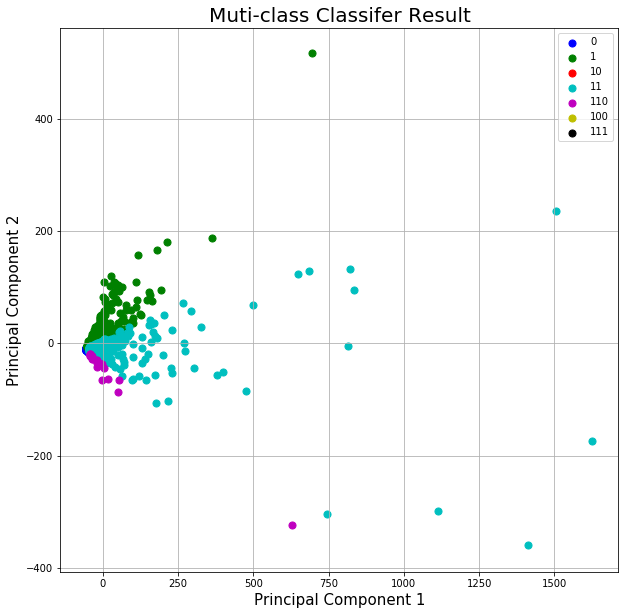

In [31]:
mutiple_linear_labels = pd.DataFrame(y_predicted, columns=['linear_label'])
finalDf = pd.concat([principalDf,mutiple_linear_labels], axis = 1)
target_str = 'linear_label'
targets = [0,1,10,11,110,100,111]
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Muti-class Classifer Result', fontsize = 20)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[target_str] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [27]:
# y = np.transpose(y)
y_testing = OneVsRestClassifier(LinearSVC(random_state=8)).fit(X, y).predict(principalComponents_testing) 